In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
tes = pd.read_csv('../Capstone_csv_file/tes_yds_salary_19-20')

In [21]:
tes.dtypes

NAME         object
YDS           int64
YDS_rank    float64
salary        int64
dtype: object

In [22]:
tes.head()

,NAME,YDS,YDS_rank,salary
0,Travis Kelce,1229,1.0,9368400
1,Darren Waller,1146,2.0,7450000
2,Zach Ertz,916,4.0,8500000
3,Mark Andrews,807,5.0,863290
4,Tyler Higbee,714,7.0,7250000


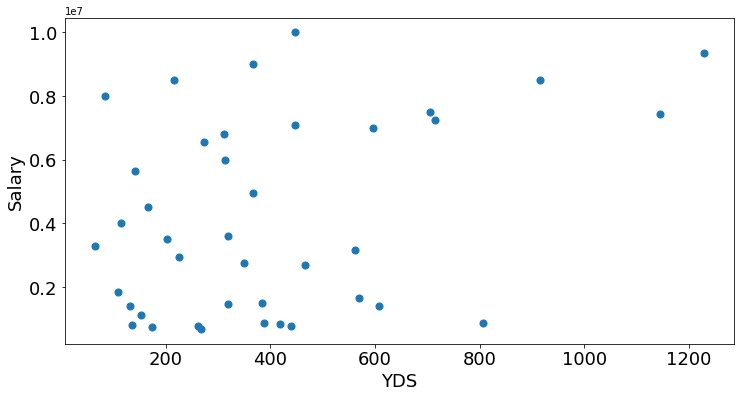

In [23]:
ax = tes.plot(kind="scatter", x = 'YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [24]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['YDS', 'salary']])

In [25]:
X.mean(axis = 0)

array([2.22044605e-17, 1.11022302e-17])

In [26]:
X.std(axis = 0)

array([1., 1.])

In [27]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [28]:
km.cluster_centers_

array([[-0.60193122,  0.73972947],
       [ 2.57089346,  1.43599748],
       [ 0.43412548, -0.88880664],
       [ 0.54607087,  1.27977287],
       [-0.72005608, -0.70751469]])

In [29]:
km.predict(X)

array([1, 1, 1, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 0, 3, 4, 4, 4,
       0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 4], dtype=int32)

In [30]:
tes['clusters'] = km.labels_
tes.head()

,NAME,YDS,YDS_rank,salary,clusters
0,Travis Kelce,1229,1.0,9368400,1
1,Darren Waller,1146,2.0,7450000,1
2,Zach Ertz,916,4.0,8500000,1
3,Mark Andrews,807,5.0,863290,2
4,Tyler Higbee,714,7.0,7250000,3


In [31]:
ss.inverse_transform(km.cluster_centers_)

array([[2.34125000e+02, 6.36941325e+06],
       [1.09700000e+03, 8.43946667e+06],
       [5.15888889e+02, 1.52766167e+06],
       [5.46333333e+02, 7.97500000e+06],
       [2.02000000e+02, 2.06665529e+06]])

In [32]:
tes.groupby('clusters')[['YDS', 'salary']].mean()

,YDS,salary
clusters,,
0,234.125000,6.369413e+06
1,1097.000000,8.439467e+06
2,515.888889,1.527662e+06
3,546.333333,7.975000e+06
4,202.000000,2.066655e+06


In [33]:
centroids = tes.groupby('clusters')[['YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

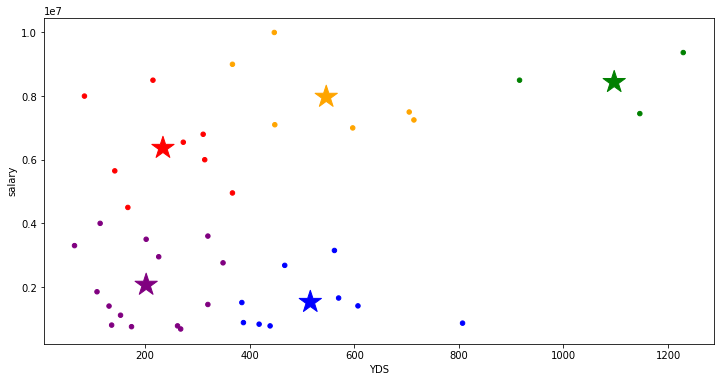

In [34]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'YDS', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [35]:
km.inertia_

12.020226256795574

In [36]:
silhouette_score(X, km.labels_)

0.38259675361676476